# Project Title: **Predicting Housing Prices in Boston**

## Objective

In this project, the goal is to predict housing prices in Boston using a variety of features from the Boston housing dataset. The dataset includes key characteristics such as crime rates, average number of rooms, distance to employment centers, and other socio-economic factors that potentially influence the price of homes. The focus is on answering the following questions:

- How can we use the data to predict housing prices?
- Which factors are the best predictors of housing prices?

The analysis aims to provide actionable insights for Urban Vision, a nonprofit focused on affordable housing and community development, to better understand the housing landscape in Boston and make informed decisions about future housing projects.

## Data Overview

The Boston housing dataset contains information on various predictors for the median house value (medv) across different census tracts in the city. The dataset includes both quantitative and qualitative variables, such as:

- **crim**: Crime rate by town
- **zn**: Proportion of residential land zoned for large lots
- **indus**: Proportion of non-retail business acres per town
- **chas**: Dummy variable indicating proximity to the Charles River
- **nox**: Nitric oxides concentration
- **rm**: Average number of rooms per dwelling
- **age**: Proportion of owner-occupied units built before 1940
- **dis**: Weighted distances to employment centers
- **rad**: Index of accessibility to radial highways
- **tax**: Property tax rate
- **ptratio**: Pupil-teacher ratio by town
- **lstat**: Percentage of lower status of the population
- **medv**: Median house value in $1000s (target variable)


In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


df = pd.read_csv("data/Boston.csv",usecols=range(1,14))



## Methodology

1. **Data Preprocessing and Exploration**
   - **Summary Statistics**: We began by generating summary statistics of the dataset to understand the distributions and key characteristics of the features using `describe()` method.
   - **Train-Test Split**: The dataset was split into training (80%) and testing (20%) sets using `train_test_split` to ensure that model performance could be evaluated properly and to avoid overfitting.
   - **Scaling**: We scaled the numerical features using `StandardScaler` to normalize the data. This ensures that features with large numerical ranges don't dominate the model.

2. **Modeling**
   - **Linear Regression Model**: We employed a linear regression model to predict housing prices. This was chosen due to the continuous nature of the target variable (`medv`), and the assumption that relationships between predictors and the target variable may be approximately linear.
   - **Model Fitting**: The model was trained using the scaled features from the training set.

3. **Evaluation**
   - We used multiple performance metrics to assess the model, including:
     - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
     - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     - **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a more interpretable metric in terms of the unit of the target variable.
     - **R-squared (R2)**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

4. **Visualization**
   - **Predicted vs. Actual Plot**: A scatterplot was created to visualize the relationship between the predicted and actual median house values. A red dashed line at 45 degrees indicates perfect predictions.
   - **Residual Plot**: A histogram of residuals (the difference between the actual and predicted values) was plotted to assess the distribution of prediction errors and check for any patterns that might indicate model inadequacy.


In [42]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


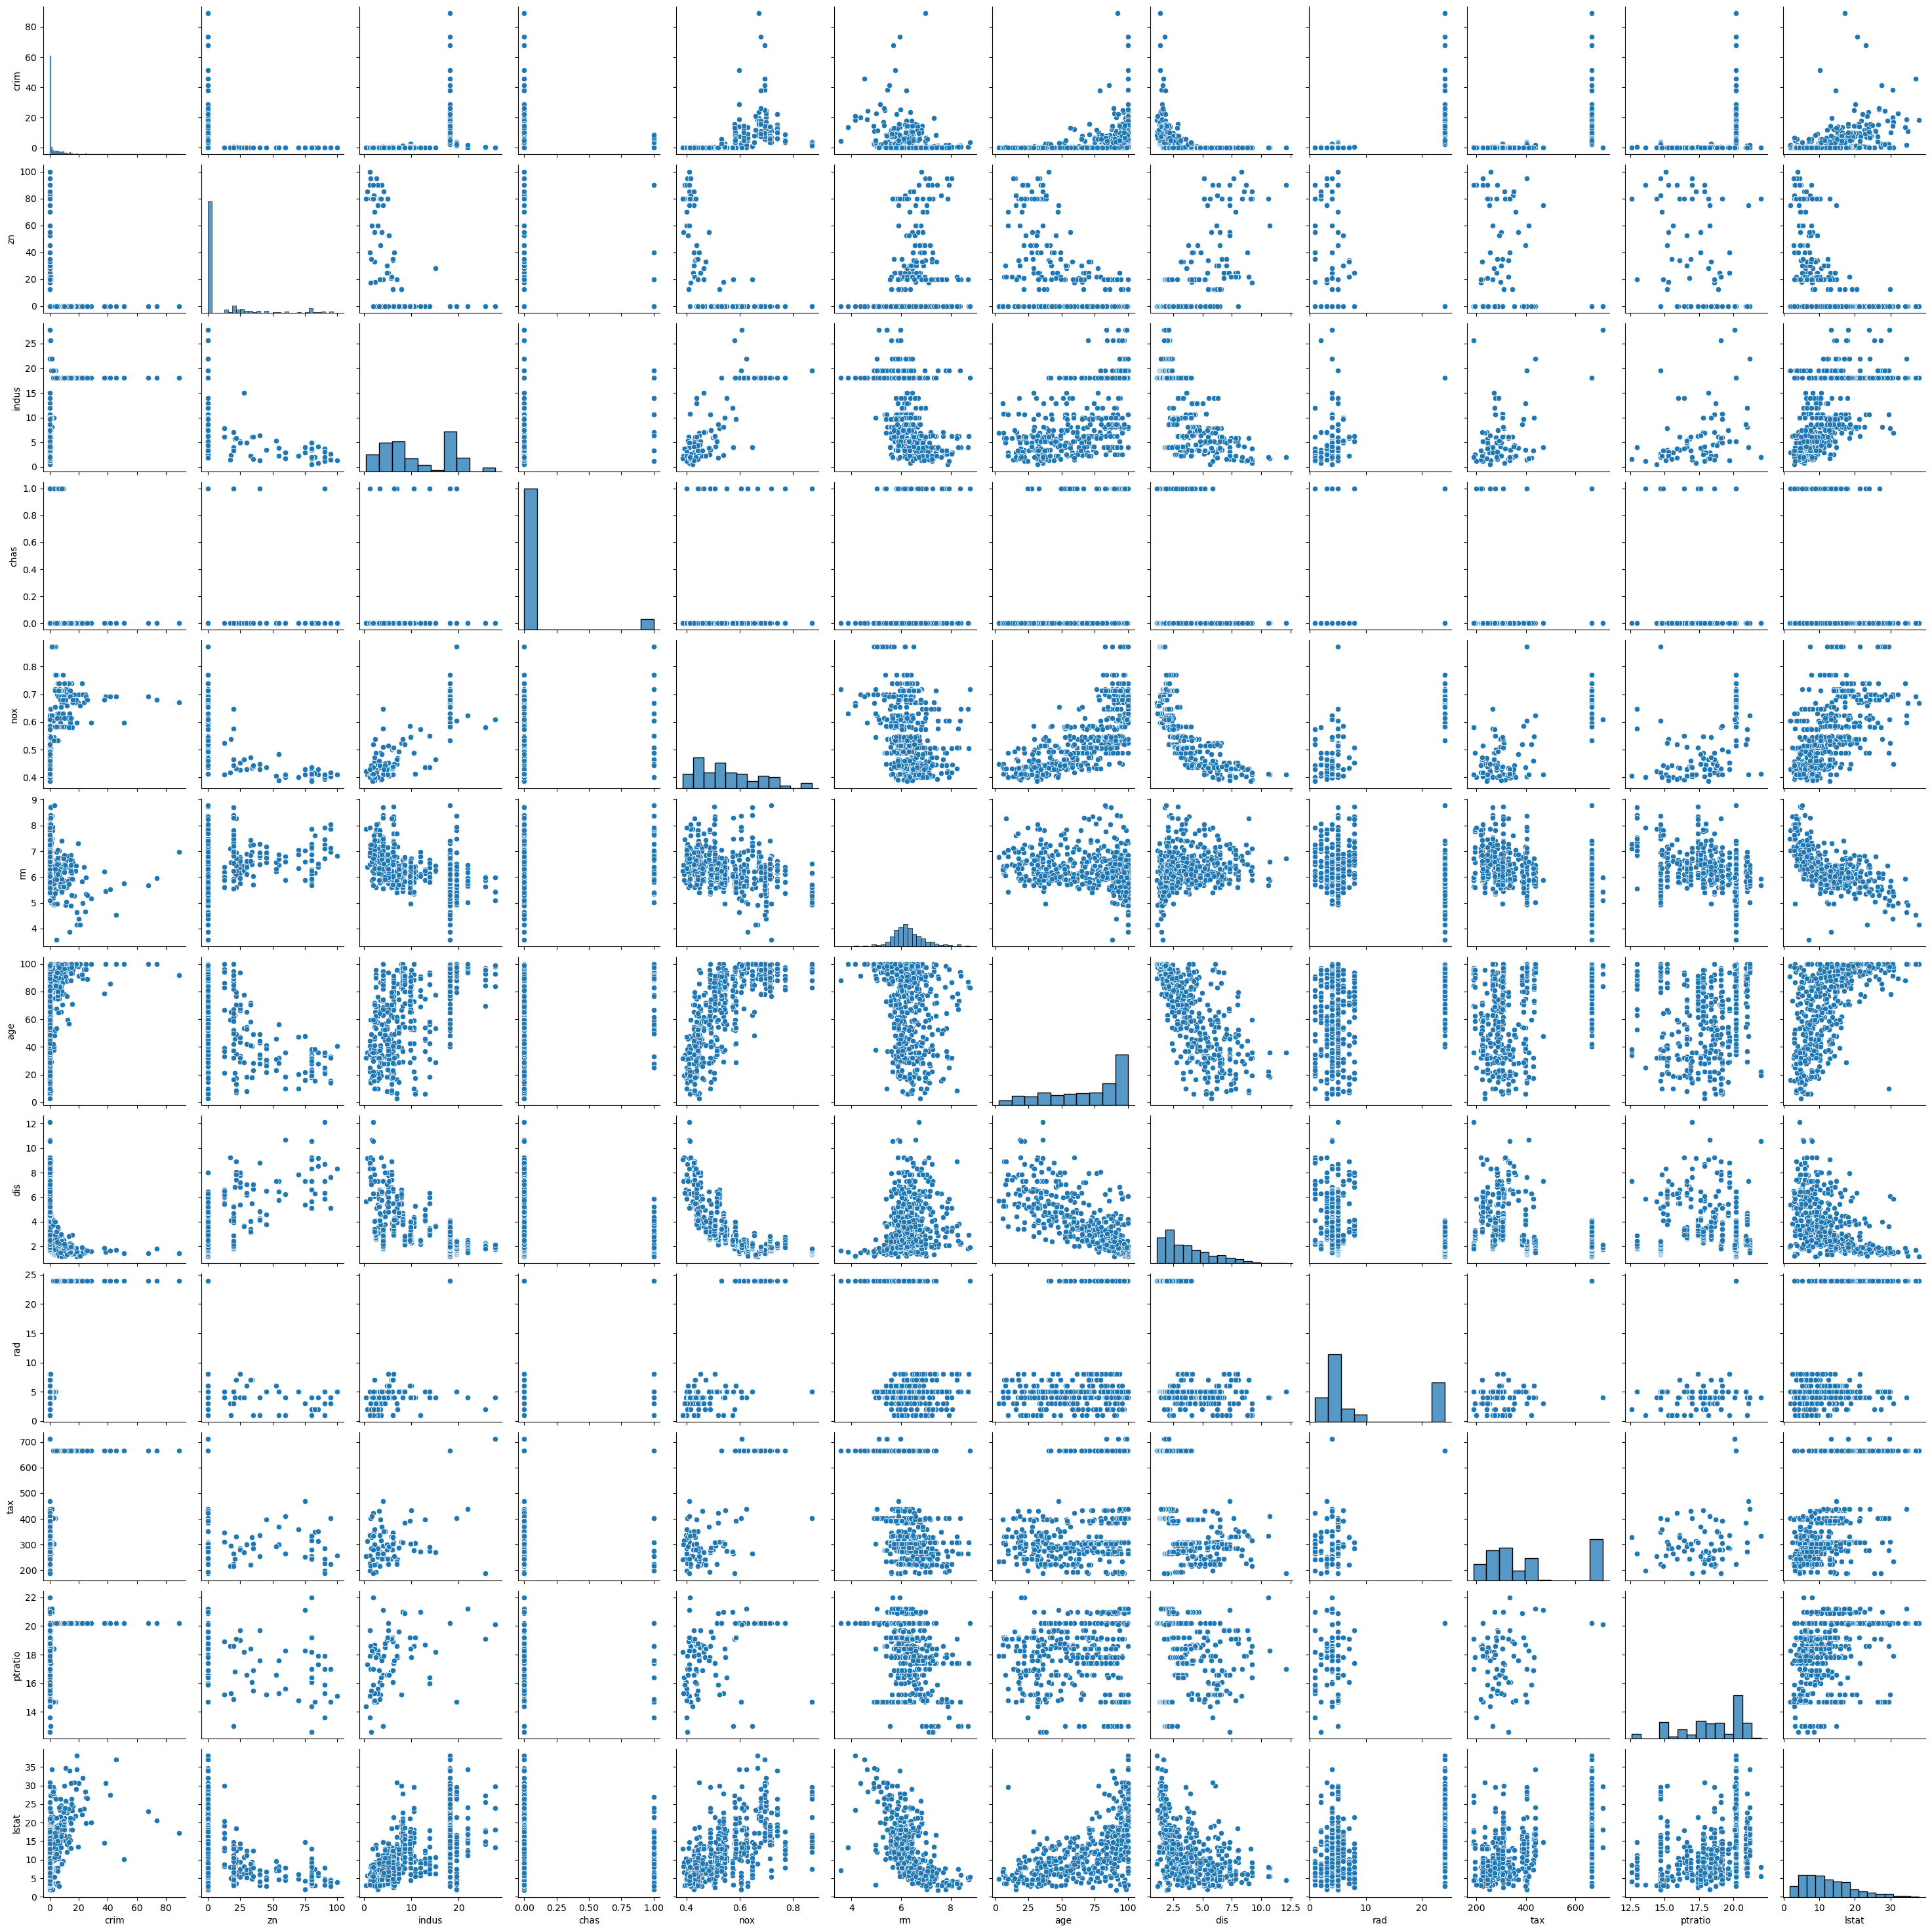

In [20]:
sns.pairplot(df)

In [44]:
# Split data into training and testing sets
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Create a pipeline with scaling and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

In [48]:
# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

## Results

- **Model Performance**: The model produced the following evaluation metrics:

  - **MAE**: Mean Absolute Error
  - **MSE**: Mean Squared Error
  - **RMSE**: Root Mean Squared Error
  - **R²**: R-squared (Proportion of variance explained)

- **Key Insights from Visualizations**:
  - The predicted vs. actual plot showed that the linear regression model generally performs well for most of the data points. However, there are some outliers where the predictions are less accurate.
  - The residual plot indicates a fairly normal distribution of residuals, suggesting that the assumptions of linear regression may hold. However, further examination might be needed to confirm the adequacy of the model.


In [50]:
# Extract mean scores from cross-validation
mean_r2 = np.mean(cv_results['test_r2'])
mean_mse = -np.mean(cv_results['test_mse'])  # Convert to positive
mean_mae = -np.mean(cv_results['test_mae'])  # Convert to positive

print(f"Cross-validated R²: {mean_r2:.2f}")
print(f"Cross-validated MSE: {mean_mse:.2f}")
print(f"Cross-validated MAE: {mean_mae:.2f}")



Cross-validated R²: 0.71
Cross-validated MSE: 25.30
Cross-validated MAE: 3.56


In [52]:
# Train model on full training set
pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = pipeline.predict(X_test)

# Evaluate on test set
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Test R²: {test_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Test R²: 0.69
Test MSE: 22.78
Test MAE: 3.11


## Visualizations

### Predicted vs. Actual Plot

A scatter plot showing the relationship between predicted and actual median home values. The red dashed line represents perfect prediction


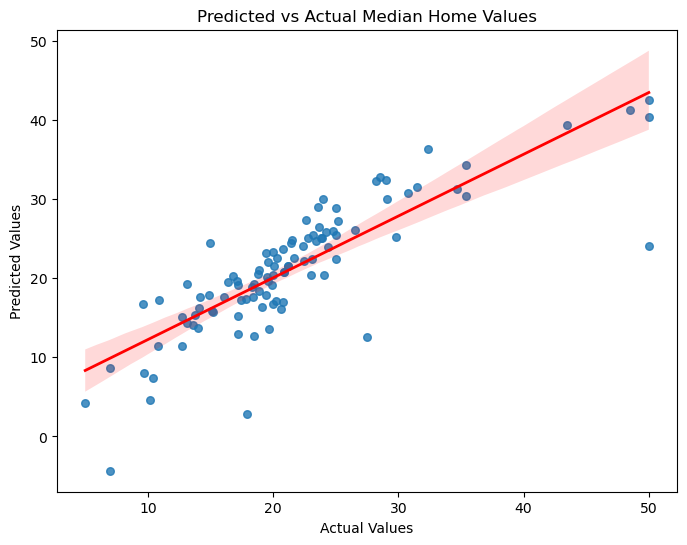

In [64]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 30}, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Median Home Values")
plt.show()

# Residual Histogram

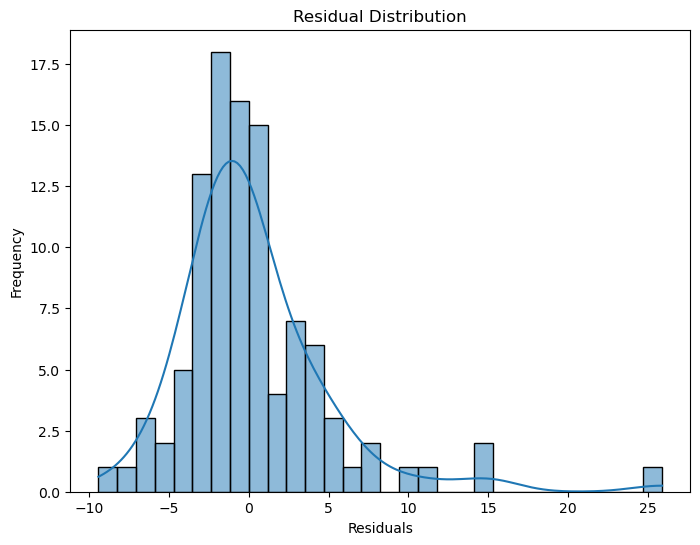

In [61]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()